In [27]:
#2. 
#a) Preprocess the data by removing the categorical column and filling the missing values

#Preprocessing data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('CC GENERAL.csv')
print(data.columns)

# Removing categorical columns
df = data.select_dtypes(exclude='object')
print(df.columns)

# Filling the missing values
df.fillna(df.mean(),inplace=True)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [32]:
# 2.b)
# Apply StandardScaler() and normalize() functions to scale and normalize raw input data

# Scaling the data using StandardScaler()
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
df1 = sc.fit_transform(df)
print("Scaled data:")
print(df1)

# Normalizing the data using normalize()
from sklearn.preprocessing import Normalizer
nm = Normalizer()
df2 = nm.fit_transform(df.values)
print("Normalized data:")
print(df2)


Scaled data:
[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]
Normalized data:
[[3.93529208e-02 7.87219116e-04 9.17897286e-02 ... 1.34230246e-01
  0.00000000e+00 1.15458778e-02]
 [2.93875725e-01 8.34231054e-05 0.00000000e+00 ... 9.84037362e-02
  2.03922922e-05 1.10118488e-03]
 [3.10797802e-01 1.24560826e-04 9.63066935e-02 ... 7.81351110e-02
  0.00000000e+00 1.49472991e-03]
 ...
 [2.27729209e-02 8.11047126e-04 1.40538302e-01 ... 8.02142497e-02
  2.43314235e-04 5.83954164e-03]
 [2.65239400e-02 1.64244246e-03 0.00000000e+00 ... 1.09890537e-01
  4.92732934

In [29]:
# 2.c) 
# Use PCA with K=2 to reduce the input dimensions to two features.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcmp = pca.fit_transform(df1)
pdf = pd.DataFrame(data = pcmp, columns = ['Principal Component 1', 'Principal Component 2'])
pdf

,Principal Component 1,Principal Component 2
0,-1.682220,-1.076450
1,-1.138293,2.506473
2,0.969686,-0.383519
3,-0.873627,0.043164
4,-1.599434,-0.688579
...,...,...
8945,-0.359630,-2.016143
8946,-0.564370,-1.639122
8947,-0.926204,-1.810784
8948,-2.336553,-0.657965


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


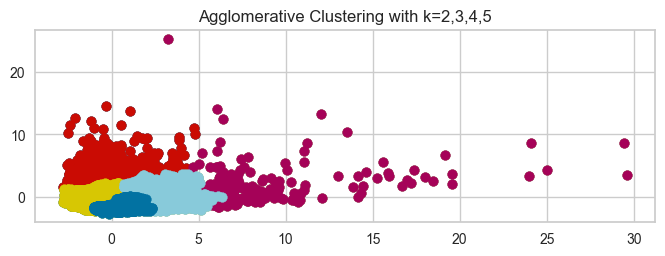

In [30]:
# 2.d)
# Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize result for each k value using scatter plot

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
for i in [2,5]:
    x = pcmp
    model = AgglomerativeClustering(n_clusters= i, affinity='euclidean', linkage='ward')
    model.fit(x)
    labels = model.labels_
    ax1 = plt.subplot(2, 1, 1)
    for k in range(0,i):
        ax1.scatter(x[labels== k, 0], x[labels==k, 1])   
    ax1.legend()
    ax1.set_title("Agglomerative Clustering with k=2,3,4,5")


SilhouetteVisualizer(ax=<AxesSubplot: >,
                     estimator=KMeans(max_iter=100, n_clusters=5,
                                      random_state=42))

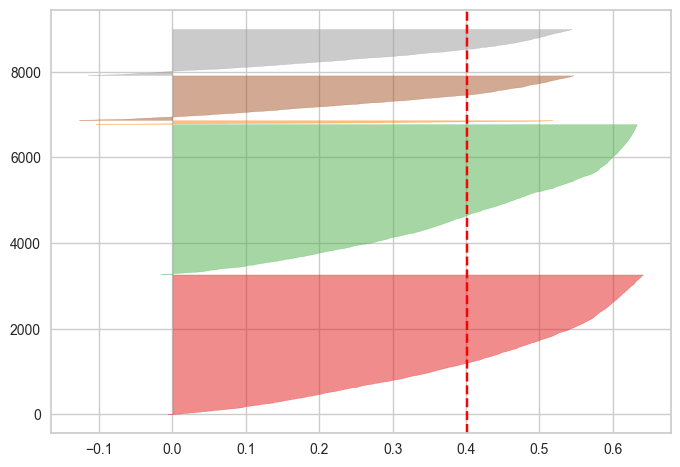

In [31]:
# 2.e)
# Evaluate different variations using Silhouette Scores and Visualize results with a bar chart

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
x = pcmp
fig, ax = plt.subplots()
for i in [2,5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(x)